In [127]:
import requests
import json
import pandas as pd

In [ ]:
#Ticker name, full name, current market price, target mean price, 52 high, 52 low, 5 current trending stock


In [154]:
stock = input()
stock_list = stock.split(',')
stockData = []

GOOG, AAPL


In [158]:
apikey = ""
for stock in stock_list:

  url = "https://yfapi.net/v6/finance/quote"
  querystring = {"symbols":stock}
  headers = {'x-api-key': apikey}

  response1 = requests.request("GET", url, headers=headers, params=querystring)

  url2 = f"https://yfapi.net/v11/finance/quoteSummary/{stock}?lang=en&region=US&modules=financialData"
  response2 = requests.request("GET", url2, headers=headers)

  url3 = "https://yfapi.net/v1/finance/trending/US"
  response3 = requests.request("GET", url3, headers=headers)

  if response1.status_code == 200 and response2.status_code == 200:
    stock_json = response1.json()
    stock_json2 = response2.json()

    ticker = stock_json['quoteResponse']['result'][0]["symbol"]
    name = stock_json['quoteResponse']['result'][0]["longName"]
    price = stock_json['quoteResponse']['result'][0]["regularMarketPrice"]
    high = stock_json['quoteResponse']['result'][0]["fiftyTwoWeekHigh"]
    low = stock_json['quoteResponse']['result'][0]["fiftyTwoWeekLow"]
    #target = stock_json2['quoteSummary']['result'][0]['financialData']['targetMeanPrice']
    print(f"Ticker: {ticker}")
    print(f"Full Name: {name}")
    print(f"Market Price: {price}")
    print(f"Target Mean Price: {response2.json()}['quoteSummary]['results'][0]['financialData']['targetMeanPrice']")
    print(f"52 Week High: {high}")
    print(f"52 Week Low: {low}")
    print(f"Trending Stock: {response3.json()['finance']['result'][0]['quotes'][:5]}")
    print("\n")

    stockData.append({
      'Ticker': ticker,
      'Full Name': name,
      'Market Price': price,
      'Mean Market Price': stock_json2['quoteSummary']['result'][0]['financialData']['targetMeanPrice'],
      '52 Week High': high,
      '52 Week Low': low,
      'Trending Stock': response3.json()['finance']['result'][0]['quotes'][:5]
    })

  else:
    print(f"Failed to retrieve data for {stock}: {response1.status_code} or {response2.status_code}")

Ticker: GOOG
Full Name: Alphabet Inc.
Market Price: 165.29
Target Mean Price: {'quoteSummary': {'result': [{'financialData': {'maxAge': 86400, 'currentPrice': {'raw': 165.29, 'fmt': '165.29'}, 'targetHighPrice': {'raw': 220.0, 'fmt': '220.00'}, 'targetLowPrice': {'raw': 145.0, 'fmt': '145.00'}, 'targetMeanPrice': {'raw': 198.92, 'fmt': '198.92'}, 'targetMedianPrice': {'raw': 202.0, 'fmt': '202.00'}, 'recommendationMean': {'raw': 1.8, 'fmt': '1.80'}, 'recommendationKey': 'buy', 'numberOfAnalystOpinions': {'raw': 12, 'fmt': '12', 'longFmt': '12'}, 'totalCash': {'raw': 100724998144, 'fmt': '100.72B', 'longFmt': '100,724,998,144'}, 'totalCashPerShare': {'raw': 8.182, 'fmt': '8.18'}, 'ebitda': {'raw': 115478003712, 'fmt': '115.48B', 'longFmt': '115,478,003,712'}, 'totalDebt': {'raw': 28718999552, 'fmt': '28.72B', 'longFmt': '28,718,999,552'}, 'quickRatio': {'raw': 1.897, 'fmt': '1.90'}, 'currentRatio': {'raw': 2.079, 'fmt': '2.08'}, 'totalRevenue': {'raw': 328284012544, 'fmt': '328.28B', 'l

In [156]:
df = pd.DataFrame(stockData)
df.to_csv('stockData.csv', index=False)
print(df)

  Ticker      Full Name  Market Price                 Mean Market Price  \
0   GOOG  Alphabet Inc.        165.29  {'raw': 198.92, 'fmt': '198.92'}   

   52 Week High  52 Week Low  \
0        193.31       121.46   

                                      Trending Stock  
0  [{'symbol': 'AMSC'}, {'symbol': 'PWR'}, {'symb...  


In [160]:
input_stock = input("Enter a stock symbol: ")

Enter a stock symbol: AAPL


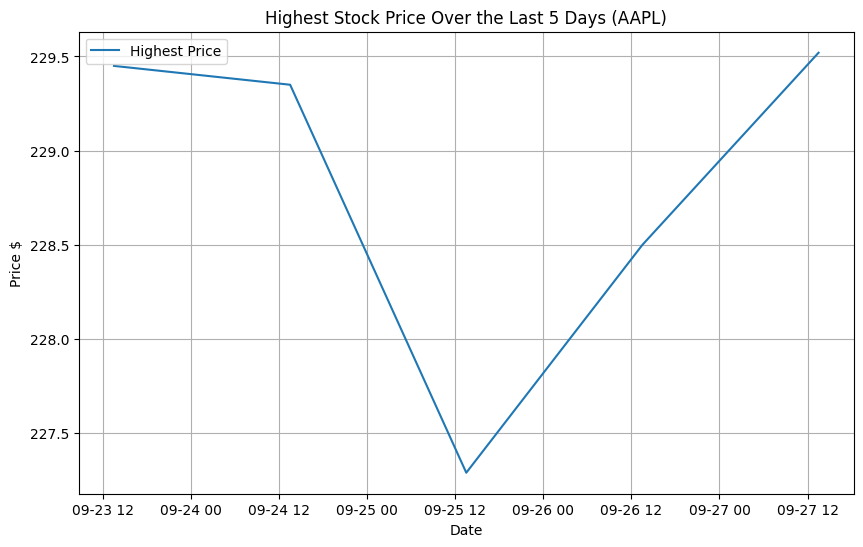

In [166]:
import matplotlib.pyplot as plt
import requests
import datetime

api_key = ""
symbol = input_stock
url = f"https://yfapi.net/v8/finance/chart/{symbol}"

querystring = {"range": "5d", "region": "US","interval": "1d", "lang": "en"}

headers = {'x-api-key': api_key}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()

    timestamps = data['chart']['result'][0]['timestamp']
    high_prices = data['chart']['result'][0]['indicators']['quote'][0]['high']

    dates = [datetime.datetime.fromtimestamp(ts) for ts in timestamps]

    plt.figure(figsize=(10, 6))
    plt.plot(dates, high_prices, label="Highest Price")

    plt.title(f"Highest Stock Price Over the Last 5 Days ({symbol})")
    plt.xlabel("Date")
    plt.ylabel("Price $")
    plt.grid(True)

    plt.legend()
    plt.show()

else:
    print(f"Failed to retrieve data: {response.status_code}")
